### INTRODUCTION

- Data can be present in different ways.
- Types of data variables present in this data:
    - **Binary data** : A binary variable a variable that has only 2 values..ie 0/1
    - **Categorical data** : A categorical variable is a variable that can take some limited number of values.for example,day of the week.It can be one of 1,2,3,4,5,6,7 only.
    - **Ordinal data** : An ordinal variable is a categorical variable that has some order associated with it.for example,the ratings that are given to a movie by a user.
    - **Nominal data** : Nominal value is a variable that has no numerical importance,such as occupation,person name etc..
    - **Timeseries data** : Time series data has a temporal value attached to it, so this would be something like a date or a time stamp that you can look for trends in time.
![Label Encoding](https://techmintz.com/wp-content/uploads/2019/12/0*emSbyTsSeHaeFUKc-780x520.jpeg)
--- 
### Why do we need Label Encoding ?

- For example, a decision tree can be learned directly from categorical data with no data transform required (this depends on the specific implementation).

- Many machine learning algorithms cannot operate on label data directly. They require all input variables and output variables to be numeric.

- In general, this is mostly a constraint of the efficient implementation of machine learning algorithms rather than hard limitations on the algorithms themselves.

- This means that categorical data must be converted to a numerical form. If the categorical variable is an output variable, you may also want to convert predictions by the model back into a categorical form in order to present them or use them in some application.
--- 
- In this notebook we will try some of the most commonly used encoding techniques.


### Downloading dataset from Kaggle using Kaggle API
- First, get kaggle.json file from your kaggle account and upload to gdrive.
- Second, Call Kaggle api to download the data 

In [1]:
from google.colab import files
uploaded  = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 69 bytes


In [2]:
!kaggle competitions download -c cat-in-the-dat

  0% 0.00/436k [00:00<?, ?B/s]
100% 436k/436k [00:00<00:00, 59.5MB/s]
 40% 5.00M/12.5M [00:00<00:00, 27.4MB/s]
100% 12.5M/12.5M [00:00<00:00, 49.7MB/s]
 60% 5.00M/8.28M [00:00<00:00, 35.0MB/s]
100% 8.28M/8.28M [00:00<00:00, 52.9MB/s]


In [3]:
!unzip test.csv.zip
!unzip train.csv.zip

Archive:  test.csv.zip
  inflating: test.csv                
Archive:  train.csv.zip
  inflating: train.csv               


--- 

### Look at the data

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn import base

In [0]:
df_train=pd.read_csv('/content/train.csv')
df_test=pd.read_csv('/content/test.csv')

In [6]:
print('train data set has got {} rows and {} columns'.format(df_train.shape[0],df_train.shape[1]))
print('test data set has got {} rows and {} columns'.format(df_test.shape[0],df_test.shape[1]))

train data set has got 300000 rows and 25 columns
test data set has got 200000 rows and 24 columns


In [7]:
df_train.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0,0,0,T,Y,Green,Triangle,Snake,Finland,Bassoon,50f116bcf,3ac1b8814,68f6ad3e9,c389000ab,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2,0
1,1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,Piano,b3b4d25d0,fbcb50fc1,3b6dd5612,4cd920251,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8,0
2,2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,Theremin,3263bdce5,0922e3cb8,a6a36f527,de9c9f684,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2,0
3,3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,Oboe,f12246592,50d7ad46a,ec69236eb,4ade6ab69,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1,1
4,4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,Oboe,5b0f5acd5,1fe17a1fd,04ddac2be,cb43ab175,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8,0


## Defining Training data and Target


In [0]:
X=df_train.drop(['target'],axis=1)
y=df_train['target']

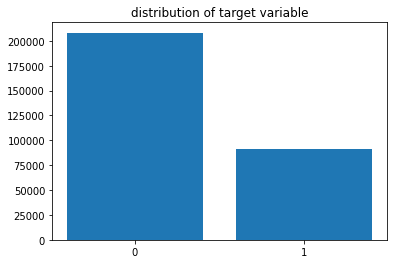

In [9]:
x=y.value_counts()
plt.bar(x.index,x)
plt.gca().set_xticks([0,1])
plt.title('distribution of target variable')
plt.show()

--- 

### Method 1: Label encoding
- In this method we change every categorical data to a number
- That is each type will be replaced by a number
- For example we will substitute 1 for Grandmaster,2 for master ,3 for expert etc.. For implementing this we will first import Labelencoder from sklearn module

In [10]:
%%time
from sklearn.preprocessing import LabelEncoder


train=pd.DataFrame()
label=LabelEncoder()
for c in  X.columns:
    if(X[c].dtype=='object'):
        train[c]=label.fit_transform(X[c])
    else:
        train[c]=X[c]
        
train.head(3)  

CPU times: user 863 ms, sys: 27.8 ms, total: 891 ms
Wall time: 892 ms




- Here you can see the label encoded output train data.We will check the shape of train data now and verify that there is no change in the number of columns.



In [11]:
print('train data set has got {} rows and {} columns'.format(train.shape[0],train.shape[1]))

train data set has got 300000 rows and 24 columns


#### Logistic Regression:
- We will use logistic regression to predict the target label on label encoded data

In [0]:
def logistic(X,y):
    X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)
    lr=LogisticRegression()
    lr.fit(X_train,y_train)
    y_pre=lr.predict(X_test)
    print('Accuracy : ',accuracy_score(y_test,y_pre))

In [13]:
logistic(train,y)

Accuracy :  0.69065


### Method 2 : On hot encoding
- This type of encoding converts each category as a one hot encoding (OHE) vector (or dummy variables). OHE is a representation method that takes each category value and turns it into a binary vector of size |i|(number of values in category i) where all columns are equal to zero besides the category column. 
- Here is a little example:
![One Hot Encoding](https://miro.medium.com/max/878/1*WXpoiS7HXRC-uwJPYsy1Dg.png)

In [14]:
%%time
from sklearn.preprocessing import OneHotEncoder


one=OneHotEncoder()
one.fit(X)
train=one.transform(X)

print('train data set has got {} rows and {} columns'.format(train.shape[0],train.shape[1]))

train data set has got 300000 rows and 316461 columns
CPU times: user 1.49 s, sys: 31.8 ms, total: 1.52 s
Wall time: 1.52 s


In [15]:
logistic(train,y)

Accuracy :  0.75715


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### Method 3 : Feature hashing (hashing trick)

- Feature hashing is a very cool technique to represent categories in a “one hot encoding style” as a sparse matrix but with a much lower dimensions. 
- In feature hashing we apply a hashing function to the category and then represent it by its indices. 
- For example, if we choose a dimension of 5 to represent “New York” we will calculate H(New York) mod 5 = 3 (for example) so New York representation will be (0,0,1,0,0).


In [16]:
%%time
from sklearn.feature_extraction import FeatureHasher



X_train_hash=X.copy()
for c in X.columns:
    X_train_hash[c]=X[c].astype('str')      
hashing=FeatureHasher(input_type='string')
train=hashing.transform(X_train_hash.values)

CPU times: user 4.08 s, sys: 63.6 ms, total: 4.14 s
Wall time: 4.16 s


In [17]:
print('train data set has got {} rows and {} columns'.format(train.shape[0],train.shape[1]))

train data set has got 300000 rows and 1048576 columns


In [18]:
logistic(train,y)

Accuracy :  0.7516833333333334


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### Method 4 : Encoding categories with dataset statistic

- Now we will try to give our models a numeric representation for every category with a small number of columns but with an encoding that will put similar categories close to each other. 
- The easiest way to do it is replace every category with the number of times that we saw it in the dataset. 
- This way if New York and New Jersey are both big cities, they will probably both appear many times in our dataset and the model will know that they are similar.

In [19]:
%%time

X_train_stat=X.copy()
for c in X_train_stat.columns:
    if(X_train_stat[c].dtype=='object'):
        X_train_stat[c]=X_train_stat[c].astype('category')
        counts=X_train_stat[c].value_counts()
        counts=counts.sort_index()
        counts=counts.fillna(0)
        counts += np.random.rand(len(counts))/1000
        X_train_stat[c].cat.categories=counts

CPU times: user 562 ms, sys: 14.3 ms, total: 576 ms
Wall time: 596 ms


In [20]:
X_train_stat.head(3)


,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
0,0,0,0,0,153535.000307,191633.000349,127341.000613,29855.000407,45979.000524,36942.000669,68448.000619,2594.000460,1148.000100,241.000134,271.000419,19.000890,2,77428.000840,33768.000056,24740.000813,3974.000743,506.000402,2,2
1,1,0,1,0,153535.000307,191633.000349,127341.000613,101181.000097,29487.000694,101123.000021,84517.000418,792.000803,842.000982,287.000052,111.000134,13.000259,1,77428.000840,22227.000246,35276.000920,18258.000000,2603.000699,7,8
2,2,0,0,0,146465.000435,191633.000349,96166.000929,101181.000097,101295.000356,101123.000021,54742.000541,2524.000536,1169.000602,475.000152,278.000688,29.000682,1,25065.000477,63908.000183,24740.000813,16927.000531,2572.000440,7,2


In [21]:
print('train data set has got {} rows and {} columns'.format(X_train_stat.shape[0],X_train_stat.shape[1]))

train data set has got 300000 rows and 24 columns


In [22]:
logistic(X_train_stat,y)

Accuracy :  0.6946


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### Encoding cyclic features

![cyclic features encoding](https://miro.medium.com/max/343/1*70cevmU8wNggGJEdLam1lw.png)

- Some of our features are cyclic in nature.ie day,month etc.

- A common method for encoding cyclical data is to transform the data into two dimensions using a sine and consine transformation.

In [23]:
%%time

X_train_cyclic=X.copy()
columns=['day','month']
for col in columns:
    X_train_cyclic[col+'_sin']=np.sin((2*np.pi*X_train_cyclic[col])/max(X_train_cyclic[col]))
    X_train_cyclic[col+'_cos']=np.cos((2*np.pi*X_train_cyclic[col])/max(X_train_cyclic[col]))
X_train_cyclic=X_train_cyclic.drop(columns,axis=1)

X_train_cyclic[['day_sin','day_cos']].head(3)

CPU times: user 256 ms, sys: 1.74 ms, total: 258 ms
Wall time: 254 ms


- Now we will use OnHotEncoder to encode other variables,then feed the data to our model.

In [24]:
one=OneHotEncoder()

one.fit(X_train_cyclic)
train=one.transform(X_train_cyclic)

print('train data set has got {} rows and {} columns'.format(train.shape[0],train.shape[1]))

train data set has got 300000 rows and 316478 columns


In [25]:
logistic(train,y)

Accuracy :  0.758


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### Method 5 : Target encoding

- Target-based encoding is numerization of categorical variables via target. 
- In this method, we replace the categorical variable with just one new numerical variable and replace each category of the categorical variable with its corresponding probability of the target (if categorical) or average of the target (if numerical). 
- The main drawbacks of this method are its dependency to the distribution of the target, and its lower predictability power compare to the binary encoding method.

- For example,

| Country | Target |
| --- | --- | 
| India  | 1 | 
| China | 0 | 
| India | 0 | 
| China | 1 | 
| India | 1 | 

- Encoding for India = [Number of true targets under the label India/ Total Number of targets under the label India] which is 2/3 = 0.66

| Country | Target |
| --- | --- | 
| India  | 0.66 | 
| China | 0.5 | 




In [26]:
%%time

X_target=df_train.copy()
X_target['day']=X_target['day'].astype('object')
X_target['month']=X_target['month'].astype('object')
for col in X_target.columns:
    if (X_target[col].dtype=='object'):
        target= dict ( X_target.groupby(col)['target'].agg('sum')/X_target.groupby(col)['target'].agg('count'))
        X_target[col]=X_target[col].replace(target).values
        
X_target.head(4)

CPU times: user 2min 24s, sys: 48.7 s, total: 3min 13s
Wall time: 3min 13s


In [27]:
logistic(X_target.drop('target',axis=1),y)

Accuracy :  0.6946166666666667


### Summary - 

- Here you can see the summary of our model performance against each of the encoding techniques we have used. 
- It is clear that OnHotEncoder together with cyclic feature encoding yielded maximum accuracy.


| ENCODING | SCORE | WALLTIME |
| --- | --- | --- |
|Label Encoding	|0.692	|892 ms|
|OnHotEncoder	|0.759	|1.52 s|
|Feature Hashing|	0.751	|4.16 s|
|Dataset statistic encoding	|0.694	|596 ms|
|Cyclic + OnHotEncoding	|0.759|	254 ms|
|Target encoding|	0.694	|3min 13s|
